In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
train=pd.read_csv('D://assignment/Unit-05-Regression-BostonHouse-BikeDemand/Kaggle-Bike-Sharing-Demand-Challenge/train.csv')
test=pd.read_csv('D://assignment/Unit-05-Regression-BostonHouse-BikeDemand/Kaggle-Bike-Sharing-Demand-Challenge/test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
#input/dependent features.,
#datetime timestamp
#season catagorical-One hot encoded
#holiday catagorical (0 or 1) -one hot encoded
#weather(catagorical 4 features clear, sunny, rainy, snow)
#temp numerical continous value
#atemp continous
#humidity continous
#windspeed continous

#Target/Independent variable
#casual continous- number of bikes hired by non registered users
#registered continous- number of bikes hired by registered users
#count-total rent by all users

#This is a multivariate linear regression problem

np.random.seed(42)


In [9]:
#Split Dataframe into dependent and target
trainfeatures = train.iloc[:,0:9] # Remember that Python 
trainfeatures

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000


In [11]:
#Get target/indenpendent features
target = train.iloc[:,10:12] # Remember that Python 
target

,registered,count
0,13,16
1,32,40
2,27,32
3,10,13
4,1,1
5,1,1
6,0,2
7,2,3
8,7,8
9,6,14


In [12]:
trainfeatures.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900


In [31]:
#Scale above features as each have different scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#eliminate timestamp feature
trainfeatures = trainfeatures.iloc[:,1:12]
trainfeatures = scaler.fit_transform(trainfeatures)
trainfeatures

array([[-1.46067232, -0.66017842, -1.33366069, -1.09273697,  0.99321305,
        -1.56775367],
       [-1.46067232, -0.66017842, -1.43890721, -1.18242083,  0.94124921,
        -1.56775367],
       [-1.46067232, -0.66017842, -1.43890721, -1.18242083,  0.94124921,
        -1.56775367],
       ..., 
       [ 0.68461625, -0.66017842, -0.80742813, -0.91395927, -0.04606385,
         0.26970368],
       [ 0.68461625, -0.66017842, -0.80742813, -0.73518157, -0.04606385,
        -0.83244247],
       [ 0.68461625, -0.66017842, -0.91267464, -0.82486544,  0.21375537,
        -0.46560752]])

In [ ]:
#Basic statistic inference
#analyze Inter Quartile Range(IQR) of the data that explains how data is spread in a bell curve
#50%  exact difference between lower bound and upper bound data from the median.,
#25%  median of the lower bound of the entire dataset
#75% median of the upper bound of the entire data spread in a bell curve


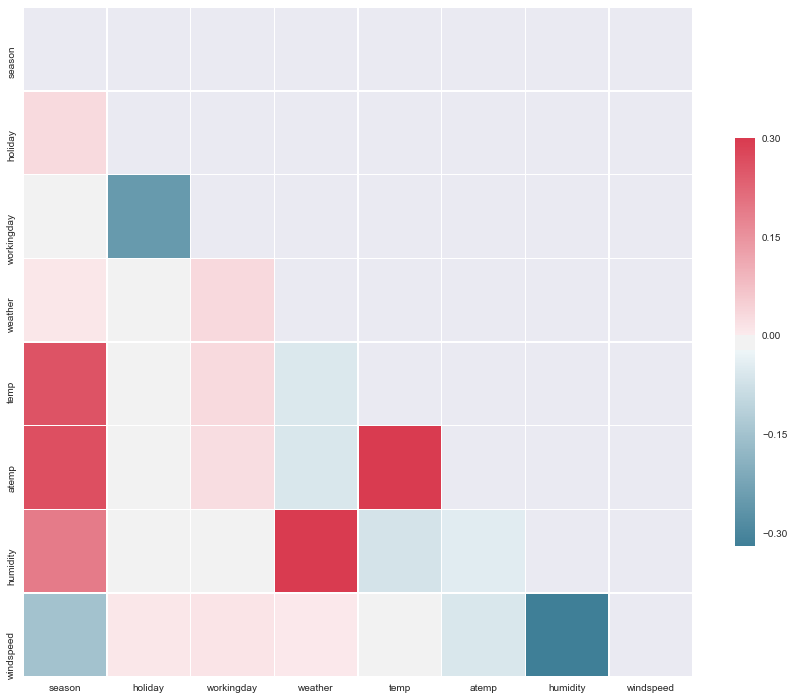

In [13]:
# compute the correlation matrix
corr = trainfeatures.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# generate a custom diverging colormap
cmap = sns.diverging_palette(225, 8, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

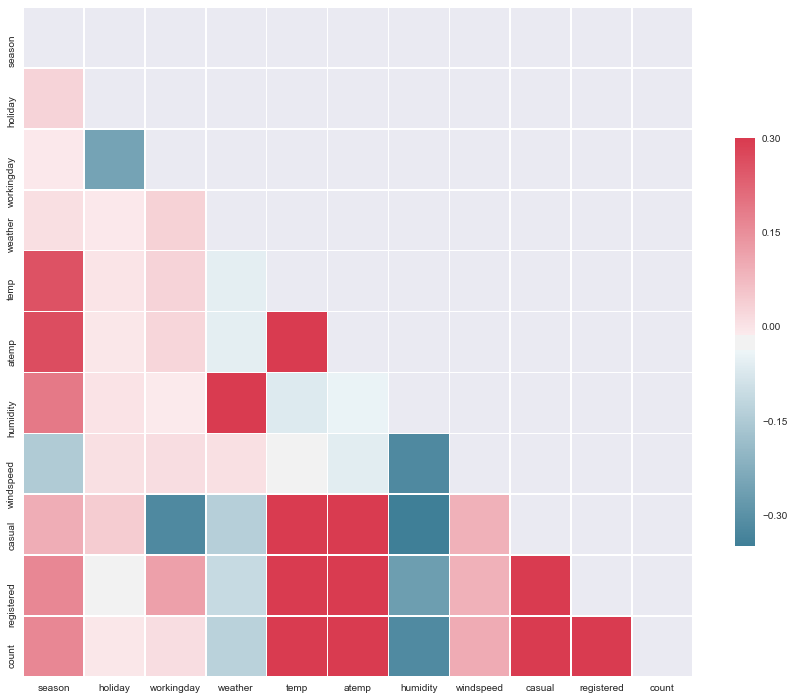

In [14]:
#Identify strongly positive correlation and negative correlation among the input features.,
#workingday->holiday Strong negative correlation
#temp->season Strong positive correlation
#atemp->season Strong positive correlation
#humidity->weather Strong positive correlation
#atemp->temp ->Strong positive correlation

#Identify correlation of all the features with the target.,
# compute the correlation matrix
corr = train.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# generate a custom diverging colormap
cmap = sns.diverging_palette(225, 8, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);


In [17]:
#With above , we can derive below useful relations.,
#The target is not highly correlated with any of the predictors and that is the ideal condition for regression

#Analyze inferential statistics
import statsmodels.formula.api as sm


In [24]:

#Get intercepts and coeffients of all predictors with the target feature casual.,
resultcasual = sm.ols(formula="casual ~ season + holiday+workingday+weather+temp+atemp+humidity+windspeed", data=train).fit()
resultcasual.params



Intercept     46.857473
season         2.032361
holiday      -12.694715
workingday   -37.178015
weather        3.333635
temp           1.328784
atemp          1.426013
humidity      -0.910410
windspeed      0.058206
dtype: float64

In [25]:
resultcasual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     1064.
Date:                Sun, 10 Jun 2018   Prob (F-statistic):               0.00
Time:                        22:28:59   Log-Likelihood:                -54877.
No. Observations:               10886   AIC:                         1.098e+05
Df Residuals:                   10877   BIC:                         1.098e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.8575      2.093     22.389      0.000      42.755      50.960
season         2.0324      0.343      5.929      0.000       1.360       2.704
holiday      -12.6947      2.227     -5.699      0.000     -17.061      -8.329
workingday   -37.1780      0.797    -46.671      0.000     -38.739     -35.617
weather        3.3336      0.629      5.297      0.000       2.100       4.567
temp           1.3288      0.274      4.842      0.000       0.791       1.867
atemp          1.4260      0.252      5.649      0.000       0.931       1.921
humidity      -0.9104      0.022    -40.908      0.000      -0.954      -0.867
windspeed      0.0582      0.048      1.211      0.226      -0.036       0.152
==============================================================================
Omnibus:                     4414.734   Durbin-Watson:                   0.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29504.708
Skew:                           1.808   Prob(JB):                         0.00
Kurtosis:                      10.209   Cond. No.                         464.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Inferential analysis with independent features and target variable.,
#F-statistics- checks for null hypothesis i.e.,if all coefficients are null.,overall significance of the model against all predictors
#P probability - chance that all coefficients are zero., the lesser it is, the better. As per above there is 0% chance that the
#coeeficients will be zero.,
#Ideally F statistic should be lesser than P value
#Ideal P value is less than 0.05

In [32]:
#Inferential analysis with target registered with all predictors
#Get intercepts and coeffients of all predictors with the target feature casual.,
resultregistered = sm.ols(formula="registered ~ season + holiday+workingday+weather+temp+atemp+humidity+windspeed", data=train).fit()
resultregistered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     331.5
Date:                Sun, 10 Jun 2018   Prob (F-statistic):               0.00
Time:                        22:46:52   Log-Likelihood:                -68879.
No. Observations:               10886   AIC:                         1.378e+05
Df Residuals:                   10877   BIC:                         1.378e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.9331      7.575     11.741      0.000      74.085     103.781
season        20.7265      1.241     16.706      0.000      18.295      23.158
holiday        3.5360      8.062      0.439      0.661     -12.266      19.338
workingday    36.0285      2.883     12.497      0.000      30.377      41.680
weather        2.6051      2.278      1.144      0.253      -1.860       7.070
temp           0.5186      0.993      0.522      0.602      -1.428       2.465
atemp          4.2052      0.914      4.603      0.000       2.414       5.996
humidity      -2.1464      0.081    -26.648      0.000      -2.304      -1.989
windspeed      0.7194      0.174      4.137      0.000       0.379       1.060
==============================================================================
Omnibus:                     3035.368   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8116.620
Skew:                           1.499   Prob(JB):                         0.00
Kurtosis:                       5.984   Cond. No.                         464.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Inferencial analysis with target variable count with all predictors
resultcount = sm.ols(formula="count ~ season + holiday+workingday+weather+temp+atemp+humidity+windspeed", data=train).fit()
resultcount.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     480.0
Date:                Sun, 10 Jun 2018   Prob (F-statistic):               0.00
Time:                        22:48:22   Log-Likelihood:                -70400.
No. Observations:               10886   AIC:                         1.408e+05
Df Residuals:                   10877   BIC:                         1.409e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    135.7905      8.710     15.590      0.000     118.717     152.864
season        22.7588      1.427     15.953      0.000      19.962      25.555
holiday       -9.1587      9.270     -0.988      0.323     -27.330       9.012
workingday    -1.1495      3.315     -0.347      0.729      -7.648       5.349
weather        5.9387      2.619      2.267      0.023       0.805      11.073
temp           1.8474      1.142      1.618      0.106      -0.391       4.086
atemp          5.6312      1.051      5.360      0.000       3.572       7.691
humidity      -3.0568      0.093    -33.003      0.000      -3.238      -2.875
windspeed      0.7776      0.200      3.888      0.000       0.386       1.170
==============================================================================
Omnibus:                     2115.955   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4052.437
Skew:                           1.192   Prob(JB):                         0.00
Kurtosis:                       4.802   Cond. No.                         464.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""